## Gradient Descent for Minimizing a Convex Function

### Introduction
This notebook implements a Gradient Descent (GD) algorithm to find the minimum point of a convex, differentiable function in a single variable. The steps below follow the assignment requirements to select a function, compute its gradient, implement GD, and visualize the results.

### Step 1: Function Definition and Plot
We chose a convex quadratic function of the form:
\[
f(x) = ax^2 + bx + c
\]
with parameters \( a = 2 \), \( b = 3 \), and \( c = 4 \), ensuring \( a > 0 \) to maintain convexity. The function is plotted over the interval \( -10 \leq x \leq 10 \).

### Step 2: Derivative Calculation
The derivative of \( f(x) \) is:
\[
f'(x) = 2ax + b
\]
This derivative, implemented as `f_prime(x)`, provides the gradient needed to update \( x \) in each step of the GD algorithm.

### Step 3: Analytical Solution
The minimum point of a convex quadratic function \( f(x) = ax^2 + bx + c \) occurs where the derivative is zero:
\[
x = -\frac{b}{2a}
\]
We compute this analytically for comparison with the solution obtained by GD.

### Step 4: Gradient Descent Update Function
The GD update rule for minimizing a function \( f(x) \) is:
\[
x_{\text{next}} = x - \eta \cdot f'(x)
\]
where \( \eta \) is the learning rate, controlling the step size. We implement this update rule in the function `gradient_descent_step()`.

### Step 5: Implement Gradient Descent to Find the Minimum
The function `find_minimum()` initializes \( x \) at a chosen starting point and iteratively applies the GD update rule until convergence. Convergence is defined as the difference between consecutive \( x \)-values being less than a specified tolerance. We also save each \( x \) value in the descent path for later analysis.

### Step 6: Testing Hyperparameters
To examine how different hyperparameters affect convergence, we tested various combinations of learning rates and tolerances. We observed how these values influence the convergence behavior and selected settings that yielded low \( f(x) \) values without excessive iteration.

### Step 7: Visualization of Gradient Descent Path
Finally, we plot the function \( f(x) \) and overlay the gradient descent path, showing each descent step as a scatter plot on the function curve. This visualization demonstrates how the algorithm iteratively approaches the minimum.

### Summary
This notebook demonstrates using gradient descent to find the minimum of a simple convex function, with analysis of convergence and parameter tuning. The result confirms that the GD solution matches the analytical minimum, validating the algorithm's effectiveness.


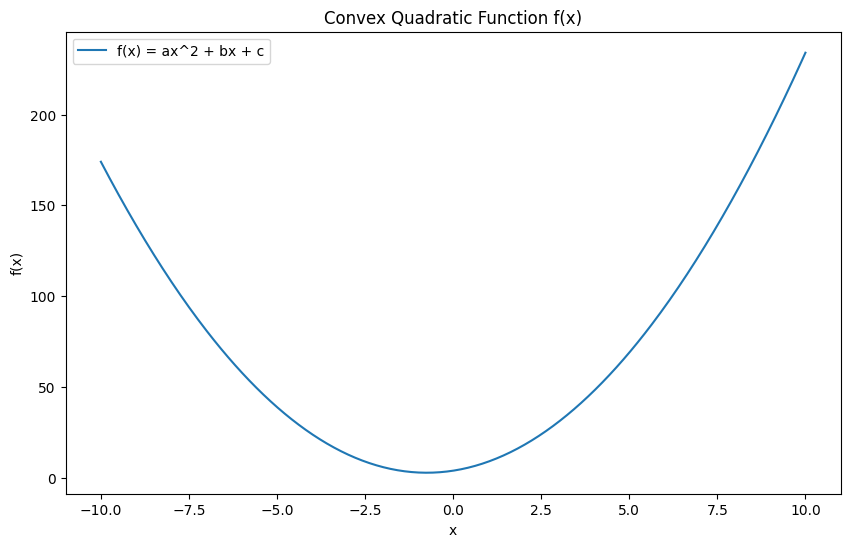

Analytical solution for minimum point: x = -0.75
Gradient Descent solution for minimum point: x = -0.7499956813540061
Difference between GD solution and analytical solution: 4.318645993928172e-06
Learning rate: 0.01, Tolerance: 0.0001 -> Converged x = -0.747505340724621
Learning rate: 0.01, Tolerance: 1e-06 -> Converged x = -0.7499752451345113
Learning rate: 0.01, Tolerance: 1e-08 -> Converged x = -0.7499997543538823
Learning rate: 0.05, Tolerance: 0.0001 -> Converged x = -0.7495317714631169
Learning rate: 0.05, Tolerance: 1e-06 -> Converged x = -0.7499956813540061
Learning rate: 0.05, Tolerance: 1e-08 -> Converged x = -0.7499999502094016
Learning rate: 0.1, Tolerance: 0.0001 -> Converged x = -0.749764177780616
Learning rate: 0.1, Tolerance: 1e-06 -> Converged x = -0.749997623455363
Learning rate: 0.1, Tolerance: 1e-08 -> Converged x = -0.7499999760499056


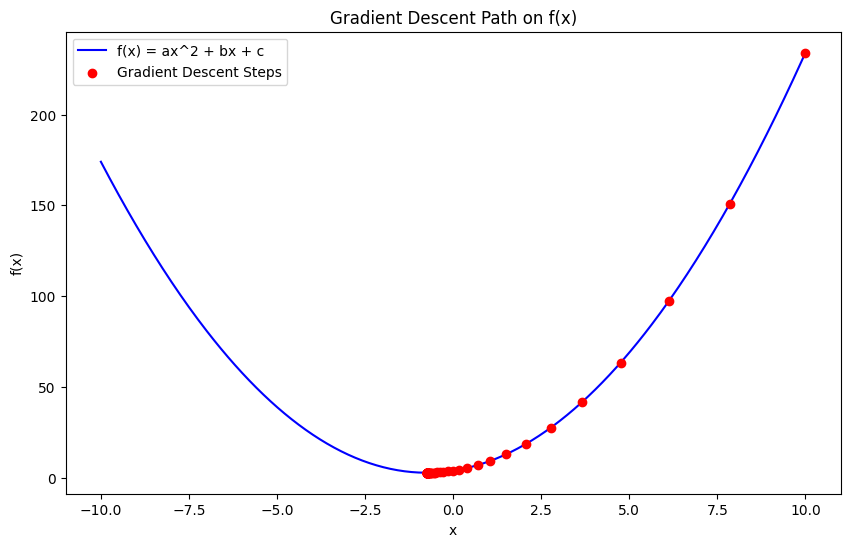

In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define a convex quadratic function and plot it
# Define parameters a, b, and c for the function f(x) = ax^2 + bx + c
a, b, c = 2, 3, 4

def f(x):
    return a * x**2 + b * x + c

# Define the x range for plotting
x_vals = np.linspace(-10, 10, 400)
y_vals = f(x_vals)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="f(x) = ax^2 + bx + c")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Convex Quadratic Function f(x)")
plt.legend()
plt.show()

# Step 2: Derivative of the function
# The derivative is f'(x) = 2ax + b
def f_prime(x):
    return 2 * a * x + b

# Step 3: Analytical solution for the minimum point
x_min_analytical = -b / (2 * a)
print(f"Analytical solution for minimum point: x = {x_min_analytical}")

# Step 4: Gradient descent update function
def gradient_descent_step(grad_func, x_current, learning_rate):
    return x_current - learning_rate * grad_func(x_current)

# Step 5: Implement gradient descent to find the minimum
def find_minimum(f_prime, x_init, learning_rate=0.01, tolerance=1e-6, max_iters=1000):
    x_current = x_init
    x_history = [x_current]
    
    for _ in range(max_iters):
        x_next = gradient_descent_step(f_prime, x_current, learning_rate)
        x_history.append(x_next)
        
        # Check for convergence
        if abs(x_next - x_current) < tolerance:
            break
        x_current = x_next
    
    return x_current, x_history

# Initial conditions for gradient descent
x_init = 10  # initial point
learning_rate = 0.05
tolerance = 1e-6

# Find minimum using gradient descent
x_min_gd, x_history = find_minimum(f_prime, x_init, learning_rate, tolerance)

print(f"Gradient Descent solution for minimum point: x = {x_min_gd}")
print(f"Difference between GD solution and analytical solution: {abs(x_min_gd - x_min_analytical)}")

# Step 6: Repeat with a range of hyperparameters and store the history
learning_rates = [0.01, 0.05, 0.1]
tolerances = [1e-4, 1e-6, 1e-8]

# Test various hyperparameters and print results
for lr in learning_rates:
    for tol in tolerances:
        x_min, x_hist = find_minimum(f_prime, x_init, learning_rate=lr, tolerance=tol)
        print(f"Learning rate: {lr}, Tolerance: {tol} -> Converged x = {x_min}")

# Step 7: Plot the function and the descent steps
# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="f(x) = ax^2 + bx + c", color='blue')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Path on f(x)")
plt.legend()

# Scatter plot for the gradient descent path
x_gd_vals = np.array(x_history)
y_gd_vals = f(x_gd_vals)
plt.scatter(x_gd_vals, y_gd_vals, color='red', label="Gradient Descent Steps", zorder=5)

plt.legend()
plt.show()


## Implementation of SGD with SVM

### Step 1: Define the SGD with SVM Function
We implemented `sgd_with_svm`, which uses SGD to optimize an SVM objective with hinge loss. Depending on the `type_sgd` parameter, the function uses either the practical or theoretical approach for updating weights \( w \) and bias \( b \).

### Step 2: Define the Error Calculation Function
The `error_calculate` function calculates the classification error for given weights \( w \) and bias \( b \) using the provided data \( X \) and labels \( y \).

### Step 3: Load and Preprocess the Iris Dataset
We load the Iris dataset, filter the binary classes, and split it into training and validation sets for model evaluation.

### Step 4: Train Models with Different Lambda Values
We trained five SVM models with varying regularization values \( \lambda \) and calculated their training and validation errors. We also computed the margin width for each model, defined as \( \frac{1}{\|w\|} \), indicating the separation between classes.

### Step 5: Plot Errors and Margins
We plotted bar charts to compare training and validation errors across different \( \lambda \) values and to visualize the margin width for each model.

### Step 6: Training and Validation Error Over Epochs
For the chosen \( \lambda \) value, we plotted the training and validation errors over varying numbers of epochs for both practical and theoretical SGD approaches. These graphs reveal the impact of epochs on model convergence and performance.

### Conclusion
This notebook demonstrates SGD optimization on SVM with hinge loss using practical and theoretical approaches, with evaluations on different regularization values and convergence analysis over epochs.


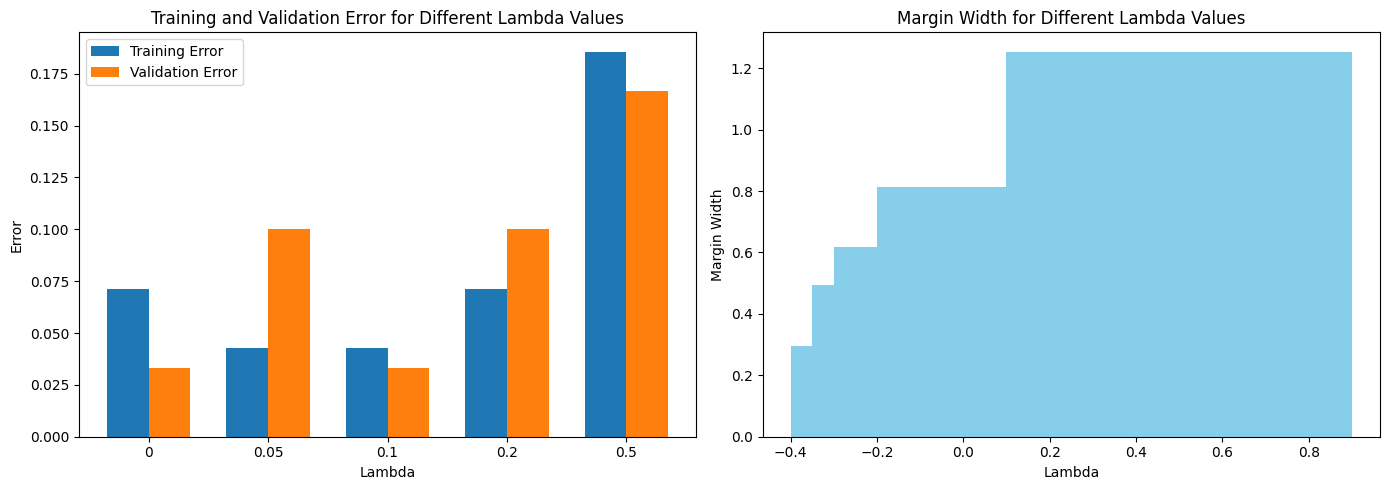

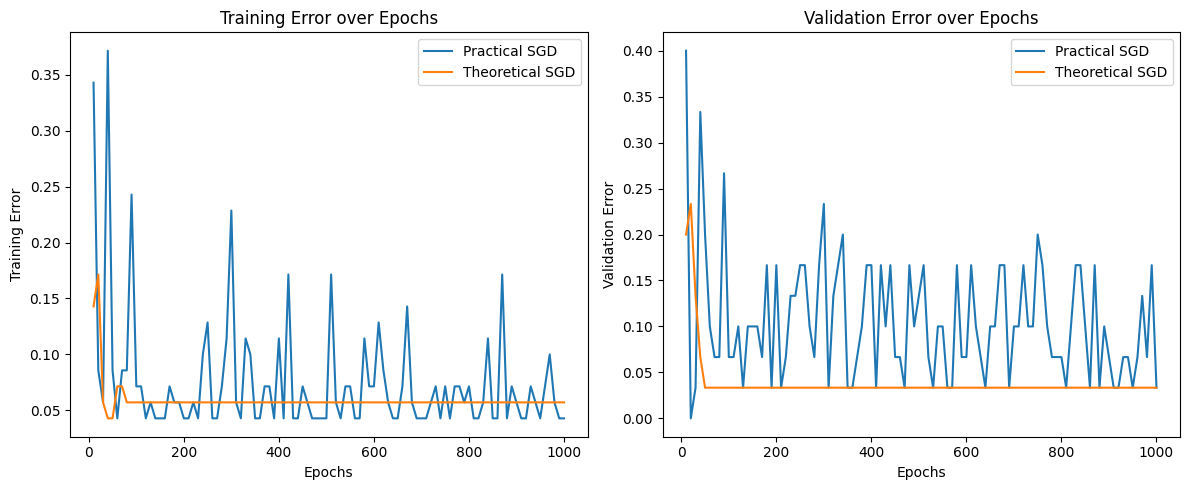

In [10]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Define the SGD with SVM function
def sgd_with_svm(X, y, lam=0, epochs=1000, rate_l=0.01, type_sgd='practical'):
    np.random.seed(2)
    m, d = X.shape
    w = np.random.uniform(0, 1, d)
    b = np.random.uniform(0, 1)
    
    if type_sgd == 'practical':
        weights_history = []
        bias_history = []
    
    w_sum = np.zeros_like(w)
    b_sum = 0
    updates_count = 0
    
    for epoch in range(epochs):
        if type_sgd == 'practical':
            # Practical SGD
            perm = np.random.permutation(m)
            for i in perm:
                xi, yi = X[i], y[i]
                if yi * (np.dot(w, xi) + b) < 1:
                    w = w - rate_l * (lam * w - yi * xi)
                    b = b + rate_l * yi
                else:
                    w = w - rate_l * lam * w
                w_sum += w
                b_sum += b
                updates_count += 1
            weights_history.append(w.copy())
            bias_history.append(b)
        else:
            # Theoretical SGD
            for _ in range(m):
                i = np.random.randint(m)
                xi, yi = X[i], y[i]
                if yi * (np.dot(w, xi) + b) < 1:
                    w = w - rate_l * (lam * w - yi * xi)
                    b = b + rate_l * yi
                else:
                    w = w - rate_l * lam * w
                w_sum += w
                b_sum += b
                updates_count += 1

    if type_sgd == 'practical':
        return weights_history, bias_history
    else:
        return w_sum / updates_count, b_sum / updates_count

# 2. Define the error calculation function
def error_calculate(w, b, X, y):
    predictions = np.sign(np.dot(X, w) + b)
    return np.mean(predictions != y)

# 3. Load and preprocess the Iris dataset
X, y = load_iris(return_X_y=True)
X = X[y != 0]
y = y[y != 0]
y[y == 2] = -1
X = X[:, 2:4]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Train models with different lambda values and collect metrics
lambdas = [0, 0.05, 0.1, 0.2, 0.5]
train_errors = []
val_errors = []
margins = []

for lam in lambdas:
    w, b = sgd_with_svm(X_train, y_train, lam=lam, epochs=1000, rate_l=0.01, type_sgd='practical')
    train_errors.append(error_calculate(w[-1], b[-1], X_train, y_train))
    val_errors.append(error_calculate(w[-1], b[-1], X_val, y_val))
    margins.append(1 / np.linalg.norm(w[-1]))

# Plot bar charts for training and validation errors across lambda values
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Training and Validation Errors
bar_width = 0.35
index = np.arange(len(lambdas))
ax[0].bar(index, train_errors, bar_width, label='Training Error')
ax[0].bar(index + bar_width, val_errors, bar_width, label='Validation Error')
ax[0].set_xlabel('Lambda')
ax[0].set_ylabel('Error')
ax[0].set_title('Training and Validation Error for Different Lambda Values')
ax[0].set_xticks(index + bar_width / 2)
ax[0].set_xticklabels(lambdas)
ax[0].legend()

# Margins
ax[1].bar(lambdas, margins, color='skyblue')
ax[1].set_xlabel('Lambda')
ax[1].set_ylabel('Margin Width')
ax[1].set_title('Margin Width for Different Lambda Values')

plt.tight_layout()
plt.show()

# 5. Plot training and validation errors over epochs for practical and theoretical SGD
chosen_lambda = 0.1
epochs_range = np.arange(10, 1001, 10)
train_errors_practical, train_errors_theory = [], []
val_errors_practical, val_errors_theory = [], []

# Practical SGD
for epochs in epochs_range:
    weights_practical, biases_practical = sgd_with_svm(X_train, y_train, lam=chosen_lambda, epochs=epochs, rate_l=0.01, type_sgd='practical')
    
    # Evaluate error using the last weights/biases from history
    train_error_practical = [error_calculate(w, b, X_train, y_train) for w, b in zip(weights_practical, biases_practical)]
    val_error_practical = [error_calculate(w, b, X_val, y_val) for w, b in zip(weights_practical, biases_practical)]
    
    train_errors_practical.append(train_error_practical[-1])
    val_errors_practical.append(val_error_practical[-1])

# Theoretical SGD
for epochs in epochs_range:
    w_theory, b_theory = sgd_with_svm(X_train, y_train, lam=chosen_lambda, epochs=epochs, rate_l=0.01, type_sgd='theory')
    train_errors_theory.append(error_calculate(w_theory, b_theory, X_train, y_train))
    val_errors_theory.append(error_calculate(w_theory, b_theory, X_val, y_val))

# Plot error vs epochs
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training errors over epochs
axes[0].plot(epochs_range, train_errors_practical, label="Practical SGD")
axes[0].plot(epochs_range, train_errors_theory, label="Theoretical SGD")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Training Error")
axes[0].set_title("Training Error over Epochs")
axes[0].legend()

# Validation errors over epochs
axes[1].plot(epochs_range, val_errors_practical, label="Practical SGD")
axes[1].plot(epochs_range, val_errors_theory, label="Theoretical SGD")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Validation Error")
axes[1].set_title("Validation Error over Epochs")
axes[1].legend()

plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def cross_validation_errors(X, y, model, folds):
    n = len(X)
    fold_size = n // folds
    train_errors = []
    val_errors = []
    
    for i in range(folds):
        start = i * fold_size
        end = (i + 1) * fold_size if i < folds - 1 else n  # Ensure the last fold includes all remaining data

        X_train = np.concatenate((X[:start], X[end:]))
        y_train = np.concatenate((y[:start], y[end:]))
        X_test = X[start:end]
        y_test = y[start:end]
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on training set
        y_train_pred = model.predict(X_train)
        train_error = np.mean(y_train_pred != y_train)
        train_errors.append(train_error)
        
        # Predict on validation set
        y_test_pred = model.predict(X_test)
        val_error = np.mean(y_test_pred != y_test)
        val_errors.append(val_error)
    
    average_train_error = np.mean(train_errors)
    average_val_error = np.mean(val_errors)
    
    return average_train_error, average_val_error

In [4]:
import sklearn.svm as svm

def svm_results(X_train, y_train, X_test, y_test):
    results = {}
    lambda_values = [0.0001, 0.01, 1, 100, 10000]
    
    for lambda_val in lambda_values:
        # Define the SVM model with the given lambda
        model = svm.SVC(C=(1/lambda_val), kernel='linear')  # Example with polynomial kernel, adjust as needed
        
        # Calculate training and validation errors using cross-validation
        avg_train_error, avg_val_error = cross_validation_errors(X_train, y_train, model, folds=5)
        
        # Fit the model on the entire training set and compute test error
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        test_error = np.mean(y_test_pred != y_test)
        
        # Store the results in the dictionary
        results[f'lambda_{lambda_val}'] = (avg_train_error, avg_val_error, test_error)
    
    return results

In [5]:
from sklearn.datasets import load_iris
iris_data = load_iris()
X, y = iris_data['data'], iris_data['target']
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

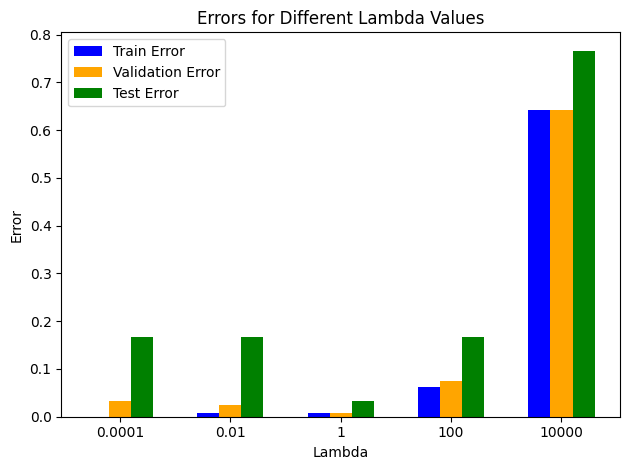

In [6]:
# Get the results
results = svm_results(X_train, y_train, X_test, y_test)

# Prepare data for plotting
lambda_values = [0.0001, 0.01, 1, 100, 10000]
train_errors = [results[f'lambda_{lambda_val}'][0] for lambda_val in lambda_values]
val_errors = [results[f'lambda_{lambda_val}'][1] for lambda_val in lambda_values]
test_errors = [results[f'lambda_{lambda_val}'][2] for lambda_val in lambda_values]

# Plotting
x = np.arange(len(lambda_values))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
bars1 = ax.bar(x - width, train_errors, width, label='Train Error', color='blue')
bars2 = ax.bar(x, val_errors, width, label='Validation Error', color='orange')
bars3 = ax.bar(x + width, test_errors, width, label='Test Error', color='green')

# Text for labels, title and x-axis tick labels
ax.set_xlabel('Lambda')
ax.set_ylabel('Error')
ax.set_title('Errors for Different Lambda Values')
ax.set_xticks(x)
ax.set_xticklabels(lambda_values)
ax.legend()

fig.tight_layout()

plt.show()